Copyright 2020 Andrew M. Olney, Dale Bowman and made available under [CC BY-SA](https://creativecommons.org/licenses/by-sa/4.0) for text and [Apache-2.0](http://www.apache.org/licenses/LICENSE-2.0) for code.

# Clustering: Problem solving

In this session, you will look at at dataset of teeth from different animals.

Each row contains the name of an animal with measurements of these variables for teeth:

| Variable | Type  | Description                    |
|:----------|:-------|:--------------------------------|
| Name     | Nominal | the name of the animal         |
| I        | Ratio | the number of top incisors     |
| i        | Ratio | the number of bottom incisors  |
| C        | Ratio | the number of top canines      |
| c        | Ratio | the number of bottom canines   |
| P        | Ratio | the number of top premolars    |
| p        | Ratio | the number of bottom premolars |
| M        | Ratio | the number of top molars       |
| m        | Ratio | the number of bottom molars    |

from *Dentition of Mammals*, Hartigan (1975), p 170.

First, you will cluster the data using hierarchical clustering (a dendrogram), followed by k-means clusters with different sizes of *g*.

## Hierarchical clustering

We need to load the data into a dataframe, so start with importing `pandas`.

In [14]:
import pandas as pd

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="mC[uX4U|oLK=BVZP#Kfx">pd</variable></variables><block type="importAs" id="wK54u3LS3m+Ce1wKHTHo" x="46" y="69"><field name="libraryName">pandas</field><field name="VAR" id="mC[uX4U|oLK=BVZP#Kfx">pd</field></block></xml>

Now load the data in `"datasets/teeth.csv"` into a dataframe, remembering that `Name` is an ID column.

In [15]:
dataframe = pd.read_csv('datasets/teeth.csv',index_col="Name")

dataframe

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="w0MtU$GK$_0i(vCQ@}s{">dataframe</variable><variable id="mC[uX4U|oLK=BVZP#Kfx">pd</variable></variables><block type="variables_set" id="KuM+Lztpz,t0b!J7}N|," x="50" y="208"><field name="VAR" id="w0MtU$GK$_0i(vCQ@}s{">dataframe</field><value name="VALUE"><block type="varDoMethod" id=":xzb]Ha/C/-.*NCGILgi"><mutation items="2"></mutation><field name="VAR" id="mC[uX4U|oLK=BVZP#Kfx">pd</field><field name="MEMBER">read_csv</field><data>pd:read_csv</data><value name="ADD0"><block type="text" id="q6UO9z*=pZ(n5Nnu0ihn"><field name="TEXT">datasets/teeth.csv</field></block></value><value name="ADD1"><block type="dummyOutputCodeBlock" id="RsfI_:+.WWNPE?H5U3bO"><field name="CODE">index_col="Name"</field></block></value></block></value></block><block type="variables_get" id="sZ#pek-1Uu0@L62P^GQW" x="8" y="296"><field name="VAR" id="w0MtU$GK$_0i(vCQ@}s{">dataframe</field></block></xml>

,I,i,C,c,P,p,M,m
Name,,,,,,,,
Opossum,5,4,1,1,3,3,4,4
Hairy_tail_mole,3,3,1,1,4,4,3,3
Common_mole,3,2,1,0,3,3,3,3
Star_nose_mole,3,3,1,1,4,4,3,3
Brown_bat,2,3,1,1,3,3,3,3
...,...,...,...,...,...,...,...,...
Antelope,0,4,0,0,3,3,3,3
Bison,0,4,0,0,3,3,3,3
Mountain_goat,0,4,0,0,3,3,3,3


Now create a dendrogram using this dataframe.

Start by importing `plotly.figure_factory` and from importing `scipy.cluster.hierarchy`.

In [16]:
import plotly.figure_factory as ff
from scipy.cluster.hierarchy import linkage

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="%;`~.nPXEejOY1;C=99]">ff</variable><variable id="ILvYb;i4@WP!P5Jwp){@">linkage</variable></variables><block type="importAs" id="ik?}Kh}Yq-Oj[NMa2UQ=" x="16" y="10"><field name="libraryName">plotly.figure_factory</field><field name="VAR" id="%;`~.nPXEejOY1;C=99]">ff</field><next><block type="importFrom" id=",=q^gd8SM.^z;BY+jxcJ"><field name="libraryName">scipy.cluster.hierarchy</field><field name="VAR" id="ILvYb;i4@WP!P5Jwp){@">linkage</field></block></next></block></xml>

Now create a dendrogram using a `linkagfun` like before.  

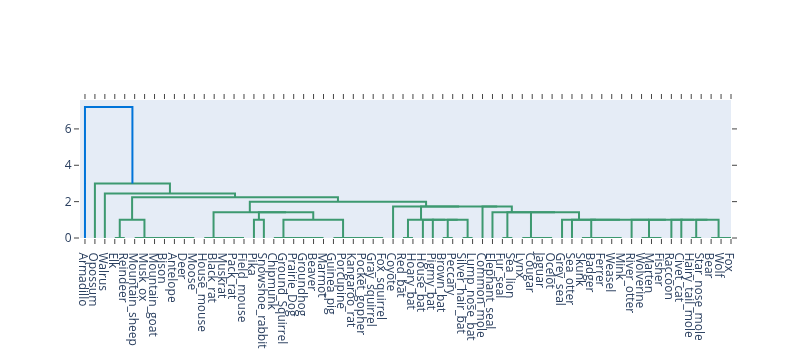

In [17]:
ff.create_dendrogram(dataframe,labels=dataframe.index,linkagefun=lambda x: linkage(dataframe, 'single', metric='euclidean'))

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="%;`~.nPXEejOY1;C=99]">ff</variable><variable id="w0MtU$GK$_0i(vCQ@}s{">dataframe</variable></variables><block type="varDoMethod" id="+O_0iEpbpse+?QPja?B)" x="8" y="176"><mutation items="3"></mutation><field name="VAR" id="%;`~.nPXEejOY1;C=99]">ff</field><field name="MEMBER">create_dendrogram</field><data>ff:create_dendrogram</data><value name="ADD0"><block type="variables_get" id="{KzeCp3;G1:ZheyGIA.A"><field name="VAR" id="w0MtU$GK$_0i(vCQ@}s{">dataframe</field></block></value><value name="ADD1"><block type="dummyOutputCodeBlock" id="m=Jnsk{m#k?|oDDuIZau"><field name="CODE">labels=dataframe.index</field></block></value><value name="ADD2"><block type="dummyOutputCodeBlock" id="9:Ae#!2koBrVX~m34|_l"><field name="CODE">linkagefun=lambda x: linkage(dataframe, 'single', metric='euclidean')</field></block></value></block></xml>

If it's hard to read because of the size, try using the plot interactive tools that appear in the top right of the plot when you hover over it.

-----------------
**QUESTION:**

At what point on the y-axis (between 0 and 7) would you draw a horizontal line to get the best clusters?
Why wouldn't you draw it higher or lower?
How many clusters would this give you?

**ANSWER: (click here to edit)**

*About 1.7. This would group all the grazing animals together, all the rat-type animals together, the bats together, and the predators together. This would give 6 real clusters with maybe another 3-4 junk clusters.*


<hr>

## K-means

Do K-means with this same data, using the number of clusters you identified above using the dendrogram.

First import `sklearn.cluster`.

In [18]:
import sklearn.cluster as cluster

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="=4%?D}KQzh(;hT$}4r1B">cluster</variable></variables><block type="importAs" id="V!Slhkt7E`ZS,(q7,q?4" x="16" y="10"><field name="libraryName">sklearn.cluster</field><field name="VAR" id="=4%?D}KQzh(;hT$}4r1B">cluster</field></block></xml>

Create a `KMeans` with your number of clusters and store it in a variable.

In [19]:
kmeans = cluster.KMeans(n_clusters=6)

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="8$7LU#7XT!kIhX2_B{h!">kmeans</variable><variable id="=4%?D}KQzh(;hT$}4r1B">cluster</variable></variables><block type="variables_set" id="?4-jgMaj`8xuGn2JXC|K" x="-51" y="167"><field name="VAR" id="8$7LU#7XT!kIhX2_B{h!">kmeans</field><value name="VALUE"><block type="varCreateObject" id="2zBw%H,SCeuvo;eWIqNE"><mutation items="1"></mutation><field name="VAR" id="=4%?D}KQzh(;hT$}4r1B">cluster</field><field name="MEMBER">KMeans</field><data>cluster:KMeans</data><value name="ADD0"><block type="dummyOutputCodeBlock" id="~P+jUJFNkLea!lJvEq{O"><field name="CODE">n_clusters=6</field></block></value></block></value></block></xml>

Using `fit_predict` get clusters and display them.

In [20]:
kmeansPredictions = kmeans.fit_predict(dataframe)

kmeansPredictions

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="%tOoU9%wt$a7gwK!}w6I">kmeansPredictions</variable><variable id="8$7LU#7XT!kIhX2_B{h!">kmeans</variable><variable id="w0MtU$GK$_0i(vCQ@}s{">dataframe</variable></variables><block type="variables_set" id="eW`j#vgy%L}_2,!aFrk$" x="-14" y="150"><field name="VAR" id="%tOoU9%wt$a7gwK!}w6I">kmeansPredictions</field><value name="VALUE"><block type="varDoMethod" id="f@W.Y*=7*XvrYClk$b6^"><mutation items="1"></mutation><field name="VAR" id="8$7LU#7XT!kIhX2_B{h!">kmeans</field><field name="MEMBER">fit_predict</field><data>kmeans:fit_predict</data><value name="ADD0"><block type="variables_get" id="+D|]0Am8;GATjh#ckRhz"><field name="VAR" id="w0MtU$GK$_0i(vCQ@}s{">dataframe</field></block></value></block></value></block><block type="variables_get" id="05l$^=D]KUe2C:Rd]8Lr" x="-20" y="233"><field name="VAR" id="%tOoU9%wt$a7gwK!}w6I">kmeansPredictions</field></block></xml>

array([4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 1, 5, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2],
      dtype=int32)

Add these predictions as a new column, `cluster` in your dataframe, converting them to `str` type for plotting:

In [40]:
dataframe = dataframe.assign(cluster= (kmeansPredictions.astype(str)))

dataframe

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="w0MtU$GK$_0i(vCQ@}s{">dataframe</variable><variable id="%tOoU9%wt$a7gwK!}w6I">kmeansPredictions</variable></variables><block type="variables_set" id="ebr8@2oFxF)@[;i/rM6%" x="-58" y="79"><field name="VAR" id="w0MtU$GK$_0i(vCQ@}s{">dataframe</field><value name="VALUE"><block type="varDoMethod" id="v+8hRH^+Pm[2z_D0y:/8"><mutation items="1"></mutation><field name="VAR" id="w0MtU$GK$_0i(vCQ@}s{">dataframe</field><field name="MEMBER">assign</field><data>dataframe:assign</data><value name="ADD0"><block type="valueOutputCodeBlock" id="?A3fIujkSDtVqq+9Giq_"><field name="CODE">cluster=</field><value name="INPUT"><block type="varDoMethod" id="^G$n(gB1tSV7s$y`ZTex"><mutation items="1"></mutation><field name="VAR" id="%tOoU9%wt$a7gwK!}w6I">kmeansPredictions</field><field name="MEMBER">astype</field><data>kmeansPredictions:astype</data><value name="ADD0"><block type="dummyOutputCodeBlock" id=":--7H/U:ySsbwmv9bG9|"><field name="CODE">str</field></block></value></block></value></block></value></block></value></block><block type="variables_get" id="kl*dsWU=Y?#A=Lqr9t`4" x="17" y="243"><field name="VAR" id="w0MtU$GK$_0i(vCQ@}s{">dataframe</field></block></xml>

,I,i,C,c,P,p,M,m,cluster
Name,,,,,,,,,
Opossum,5,4,1,1,3,3,4,4,4
Hairy_tail_mole,3,3,1,1,4,4,3,3,4
Common_mole,3,2,1,0,3,3,3,3,4
Star_nose_mole,3,3,1,1,4,4,3,3,4
Brown_bat,2,3,1,1,3,3,3,3,4
...,...,...,...,...,...,...,...,...,...
Antelope,0,4,0,0,3,3,3,3,2
Bison,0,4,0,0,3,3,3,3,2
Mountain_goat,0,4,0,0,3,3,3,3,2


Take a look at your clusters with this trick to show the whole thing:

- `print with dataframe do to_string using`

In [42]:
print(dataframe.to_string())

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="w0MtU$GK$_0i(vCQ@}s{">dataframe</variable></variables><block type="text_print" id="bD+I+Zcqh}ln]Z$PkFg9" x="35" y="27"><value name="TEXT"><block type="varDoMethod" id="%kFDvIpl1]#$XQQS!{mW"><mutation items="1"></mutation><field name="VAR" id="w0MtU$GK$_0i(vCQ@}s{">dataframe</field><field name="MEMBER">to_string</field><data>dataframe:to_string</data></block></value></block></xml>

                 I  i  C  c  P  p  M  m cluster
Name                                           
Opossum          5  4  1  1  3  3  4  4       4
Hairy_tail_mole  3  3  1  1  4  4  3  3       4
Common_mole      3  2  1  0  3  3  3  3       4
Star_nose_mole   3  3  1  1  4  4  3  3       4
Brown_bat        2  3  1  1  3  3  3  3       4
Silver_hair_bat  2  3  1  1  2  3  3  3       4
Pigmy_bat        2  3  1  1  2  2  3  3       4
House_bat        2  3  1  1  1  2  3  3       4
Red_bat          1  3  1  1  2  2  3  3       4
Hoary_bat        1  3  1  1  2  2  3  3       4
Lump_nose_bat    2  3  1  1  2  3  3  3       4
Armadillo        0  0  0  0  0  0  8  8       3
Pika             2  1  0  0  2  2  3  3       0
Snowshoe_rabbit  2  1  0  0  3  2  3  3       0
Beaver           1  1  0  0  2  1  3  3       0
Marmot           1  1  0  0  2  1  3  3       0
Groundhog        1  1  0  0  2  1  3  3       0
Prairie_Dog      1  1  0  0  2  1  3  3       0
Ground_Squirrel  1  1  0  0  2  1  3  3 

-----------------
**QUESTION:**

For each one of your clusters, what kind of animal does the cluster correspond to?

**ANSWER: (click here to edit)**

- 5 is moles and large predators
- 4 is bats
- 1 is rats
- 0 is predators
- 2 is hearding animals
- 3 is junk/armadillo

<hr>

### Scatterplots

Make 3 scatterplots

- I vs. P
- I vs. M
- P vs. M

and color the categories in each one.
This is necessary because our data has many dimensions, but our plots only have two dimensions.

First, import `plotly.express`.

In [44]:
import plotly.express as px

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="o]8d]RxO,Gcx(.ogOS#{">px</variable></variables><block type="importAs" id="[})$jZc$15Z?OmY2rm3M" x="16" y="10"><field name="libraryName">plotly.express</field><field name="VAR" id="o]8d]RxO,Gcx(.ogOS#{">px</field></block></xml>

Create the I vs P scatterplot, but remove `ols`.

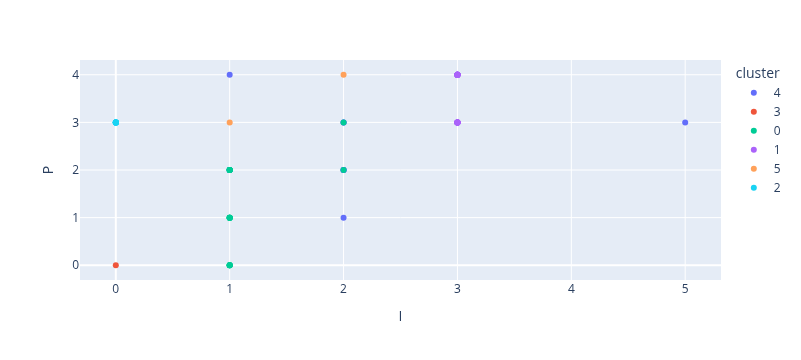

In [46]:
px.scatter(dataframe,x = "I",y = "P",color = "cluster")

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="o]8d]RxO,Gcx(.ogOS#{">px</variable><variable id="w0MtU$GK$_0i(vCQ@}s{">dataframe</variable></variables><block type="varDoMethod" id="Dn5fvKUj5b*)^9)1eTd8" x="-72" y="81"><mutation items="4"></mutation><field name="VAR" id="o]8d]RxO,Gcx(.ogOS#{">px</field><field name="MEMBER">scatter</field><data>px:scatter</data><value name="ADD0"><block type="variables_get" id="j7;K-#L?vCt~imZ?=Oax"><field name="VAR" id="w0MtU$GK$_0i(vCQ@}s{">dataframe</field></block></value><value name="ADD1"><block type="dummyOutputCodeBlock" id="Od4~8dz?HlhMIYS8s~gV"><field name="CODE">x = "I"</field></block></value><value name="ADD2"><block type="dummyOutputCodeBlock" id="pwXKi)V{FZ:PE[jU!H,r"><field name="CODE">y = "P"</field></block></value><value name="ADD3"><block type="dummyOutputCodeBlock" id="-O+U-Gyb3EVUUL/h0pO?"><field name="CODE">color = "cluster"</field></block></value></block></xml>

-----------------
**QUESTION:**

Mouse over each do to see what cluster it belongs to (it will be darker if there are many datapoints under it). 
Which clusters are well separated? 
Which are not?

**ANSWER: (click here to edit)**

Well separated:

- 2
- 3
- 4

The rest are mixed in with each other

<hr>

Create the I vs M scatterplot.

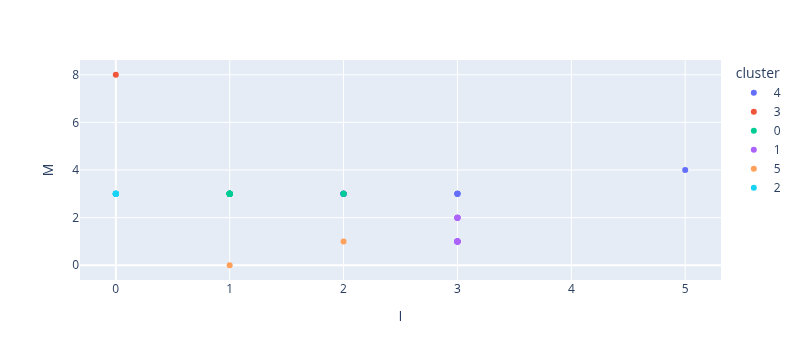

In [48]:
px.scatter(dataframe,x = "I",y = "M",color = "cluster")

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="o]8d]RxO,Gcx(.ogOS#{">px</variable><variable id="w0MtU$GK$_0i(vCQ@}s{">dataframe</variable></variables><block type="varDoMethod" id="Dn5fvKUj5b*)^9)1eTd8" x="-72" y="81"><mutation items="4"></mutation><field name="VAR" id="o]8d]RxO,Gcx(.ogOS#{">px</field><field name="MEMBER">scatter</field><data>px:scatter</data><value name="ADD0"><block type="variables_get" id="j7;K-#L?vCt~imZ?=Oax"><field name="VAR" id="w0MtU$GK$_0i(vCQ@}s{">dataframe</field></block></value><value name="ADD1"><block type="dummyOutputCodeBlock" id="Od4~8dz?HlhMIYS8s~gV"><field name="CODE">x = "I"</field></block></value><value name="ADD2"><block type="dummyOutputCodeBlock" id="pwXKi)V{FZ:PE[jU!H,r"><field name="CODE">y = "M"</field></block></value><value name="ADD3"><block type="dummyOutputCodeBlock" id="-O+U-Gyb3EVUUL/h0pO?"><field name="CODE">color = "cluster"</field></block></value></block></xml>

-----------------

**QUESTION:**

Mouse over each do to see what cluster it belongs to (it will be darker if there are many datapoints under it). 
Which clusters are well separated? 
Which are not?

**ANSWER: (click here to edit)**

All clusters are well separated


<hr>

Create the P vs M scatterplot.

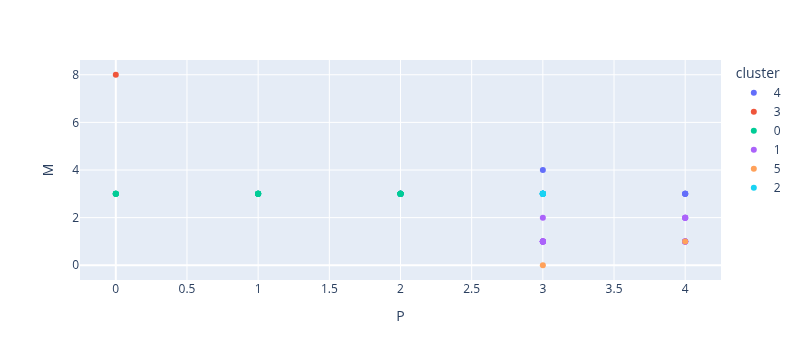

In [50]:
px.scatter(dataframe,x = "P",y = "M",color = "cluster")

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="o]8d]RxO,Gcx(.ogOS#{">px</variable><variable id="w0MtU$GK$_0i(vCQ@}s{">dataframe</variable></variables><block type="varDoMethod" id="Dn5fvKUj5b*)^9)1eTd8" x="-72" y="81"><mutation items="4"></mutation><field name="VAR" id="o]8d]RxO,Gcx(.ogOS#{">px</field><field name="MEMBER">scatter</field><data>px:scatter</data><value name="ADD0"><block type="variables_get" id="j7;K-#L?vCt~imZ?=Oax"><field name="VAR" id="w0MtU$GK$_0i(vCQ@}s{">dataframe</field></block></value><value name="ADD1"><block type="dummyOutputCodeBlock" id="Od4~8dz?HlhMIYS8s~gV"><field name="CODE">x = "P"</field></block></value><value name="ADD2"><block type="dummyOutputCodeBlock" id="pwXKi)V{FZ:PE[jU!H,r"><field name="CODE">y = "M"</field></block></value><value name="ADD3"><block type="dummyOutputCodeBlock" id="-O+U-Gyb3EVUUL/h0pO?"><field name="CODE">color = "cluster"</field></block></value></block></xml>

-----------------

**QUESTION:**

Mouse over each do to see what cluster it belongs to (it will be darker if there are many datapoints under it). 
Which clusters are well separated? 
Which are not?

**ANSWER: (click here to edit)**

All clusters are well separated

<hr>

### Summary

Now consider all your plots and clusters.

-----------------
**QUESTION:**

Do you still think your number of clusters is the best? 
Why or why not?

**ANSWER: (click here to edit)**


*The junk clusters suggest a lower cluster number might be better. However, there is good separation in 2 of 3 k-means plots, so the clusters aren't too bad as they are.*

<hr>

**QUESTION:**

If any of your scatterplot clusters were not well separated, does that concern you?

**ANSWER: (click here to edit)**


*It would if more than 1 was. Some overlap in one dimension is not that concerning when the other two dimensions are well separated.*
<hr>

<!--  -->